In [1]:
import glob
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from num2words import num2words
import math
from heapq import nlargest

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt_tsne
import matplotlib.pyplot as plt_MAP
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


import random
acc_list=[]
acc_list_mi=[]
acc_list_mi_knn=[]
acc_list_knn=[]

In [2]:

def split_train_test(all_doc,train_size):
    train.clear()
    test.clear()
    for j in range(int(train_size)):
        train.append(all_doc[int(j)])
    for k in range(int(train_size),5000):
        test.append(all_doc[k])
    
    
    print(len(train))
    print(len(test))
    

In [3]:


#print(test)
    
#print(all_doc)    

In [4]:
def preprocessing():
    counter=0
    class_in=0
    folders = [i for i in glob.glob('20_newsgroups_assi4/*')]
  
    for j in folders:
        print(j)
        df_list=[]
        subfolders=glob.glob(j+'/*')
        class_in=class_in+1
        #print(subfolders)
        for h in subfolders:
            
            templist=[]
            file=open(h)
            
            X=file.read()
            counter=counter+1
            global_doc.append(counter)
            #print(h,"............................",counter)
            X =X.lower()
            
           
                        
            
            
            translator=X.maketrans('','',string.punctuation)
            #translator=X.maketrans(string.punctuation,'                                ')
            
            X=X.translate(translator)
            #print(X)
            stop_words = set(stopwords.words('english'))
            tokens = word_tokenize(X)
            
            #tokens=list(set(tokens))

#             pattern='[0-9][a-z]|[0-9]'
#             tokens=[re.sub(pattern,'',j) for j in tokens]
            
            result = [i for i in tokens if not i in stop_words]
    #print (result)

            lemmatizer=WordNetLemmatizer()
            for word in result:
                word1=lemmatizer.lemmatize(word)
                if word1.isdecimal():
                    templist.append(num2words(word1))
                else:
                    templist.append(word1)
       #---------------------------After lemetization of doc---------------------     
            if (0<counter<=1000):
                
                if (counter in train):
                    prior_prob['c1']+=1
                    doc_count['c1']+=1
                    train_doc[counter]={}
                    
                    for token1 in templist:
                        text_class_train['c1'].append(token1)
                        if token1 in train_doc[counter]:
                            train_doc[counter][token1]+=1
                        else:
                            train_doc[counter][token1]=1
                        
                            
                            
                        
                    for  type4 in set(templist):
                        if type4 in mi_info['c1']:
                            mi_info['c1'][type4]+=1
                        else:
                            mi_info['c1'][type4]=1
                        if type4 in idf.keys():
                            idf[type4] =idf[type4]+1

                        else:
                            idf[type4]=1
                    
                 
                        
                        
                            
                         
                  
                else:
                    print("in test...............",counter)
                    test_doc[counter]=[]
                    test_doc_knn[counter]={}
                    for token2 in templist:
                        test_doc[counter].append(token2)
                        if token2 in test_doc_knn[counter]:
                            test_doc_knn[counter][token2]+=1
                        else:
                            test_doc_knn[counter][token2]=1
                    
            if (1000<counter<=2000):
                if (counter in train):
                    prior_prob['c2']+=1
                    doc_count['c2']+=1
                    train_doc[counter]={}
                    #print("in train...............",counter)
                    for token1 in templist:
                        text_class_train['c2'].append(token1)
                        if token1 in train_doc[counter]:
                            train_doc[counter][token1]+=1
                        else:
                            train_doc[counter][token1]=1
                    for  type4 in set(templist):
                        if type4 in mi_info['c2']:
                            mi_info['c2'][type4]+=1
                        else:
                            mi_info['c2'][type4]=1
                        if type4 in idf.keys():
                            idf[type4] =idf[type4]+1

                        else:
                            idf[type4]=1
                    
                    
                    
                    
                    
                else:
                    #print("in test...............",counter)
                    test_doc[counter]=[]
                    test_doc_knn[counter]={}
                    for token2 in templist:
                        
                        test_doc[counter].append(token2)   #text_class_test['c2'].append(token2)
                        if token2 in test_doc_knn[counter]:
                            test_doc_knn[counter][token2]+=1
                        else:
                            test_doc_knn[counter][token2]=1
                  
                        
                    #print("c2",len(text_class_test['c2']))
                    
            if(2000<counter<=3000):
                if (counter in train):
                    prior_prob['c3']+=1
                    doc_count['c3']+=1
                    train_doc[counter]={}
                #print("in train...............",counter)
                    for token1 in templist:
                        text_class_train['c3'].append(token1)
                      
                        if token1 in train_doc[counter]:
                            train_doc[counter][token1]+=1
                        else:
                            train_doc[counter][token1]=1
                    for  type4 in set(templist):
                        if type4 in mi_info['c3']:
                            mi_info['c3'][type4]+=1
                        else:
                            mi_info['c3'][type4]=1
                #print("c3",len(text_class_train['c3']))
                        if type4 in idf.keys():
                            idf[type4] =idf[type4]+1

                        else:
                            idf[type4]=1
                else:
                    #print("in test...............",counter)
                    test_doc[counter]=[] 
                    test_doc_knn[counter]={}#test_doc to  store doc and thier tokens
                    for token2 in templist:
                        
                        
                        test_doc[counter].append(token2)
                        if token2 in test_doc_knn[counter]:
                            test_doc_knn[counter][token2]+=1
                        else:
                            test_doc_knn[counter][token2]=1
                    #print("c3",len(text_class_test['c3']))
            if(3000<counter<=4000):
                    if (counter in train):
                        prior_prob['c4']+=1
                        doc_count['c4']+=1
                        train_doc[counter]={}
                    #print("in train..............",counter)
                        for token1 in templist:
                            text_class_train['c4'].append(token1)
                            if token1 in train_doc[counter]:
                                train_doc[counter][token1]+=1
                            else:
                                train_doc[counter][token1]=1
                            #train_doc[counter].append(token1)
                        for  type4 in set(templist):
                            if type4 in mi_info['c4']:
                                mi_info['c4'][type4]+=1
                            else:
                                mi_info['c4'][type4]=1
                    #print("c4",len(text_class_train['c4']))
                            if type4 in idf.keys():
                                idf[type4] =idf[type4]+1

                            else:
                                idf[type4]=1
                    else:
                        #print("in test...............",counter)
                        test_doc[counter]=[]
                        test_doc_knn[counter]={}
                        for token2 in templist:
                            #text_class_test['c4'].append(token2)
                            
                           
                            test_doc[counter].append(token2)
                            if token2 in test_doc_knn[counter]:
                                test_doc_knn[counter][token2]+=1
                            else:
                                test_doc_knn[counter][token2]=1
                        #print("c4",len(text_class_test['c4']))
                        
                        
            if(4000<counter<=5000):
                if (counter in train):
                    prior_prob['c5']+=1
                    doc_count['c5']+=1
                    train_doc[counter]={}
                #print("in train...............",counter)
                    for token1 in templist:
                        text_class_train['c5'].append(token1)
                        if token1 in train_doc[counter]:
                                train_doc[counter][token1]+=1
                        else:
                                train_doc[counter][token1]=1
                        #train_doc[counter].append(token1)
                    for  type4 in set(templist):
                        if type4 in mi_info['c5']:
                            mi_info['c5'][type4]+=1
                        else:
                            mi_info['c5'][type4]=1
                #print("c5",len(text_class_train['c5']))
                        if type4 in idf.keys():
                            idf[type4] =idf[type4]+1

                        else:
                            idf[type4]=1
                else:
                    #print("in test...............",counter)
                    test_doc[counter]=[]
                    test_doc_knn[counter]={}
                    for token2 in (templist):
                        #text_class_test['c5'].append(token2)
                        
                        
                        test_doc[counter].append(token2)
                        if token2 in test_doc_knn[counter]:
                            test_doc_knn[counter][token2]+=1
                        else:
                            test_doc_knn[counter][token2]=1
                        
                    #print("c5",len(text_class_test['c5']))
        if(counter == 1000):
            df_list=list(set(text_class_train['c1']))
            #print(len(df_list))
            for type1 in df_list:
                if type1 in df_dic.keys():
                     df_dic[type1]+=1
                else:
                     df_dic[type1]=1
        elif(counter == 2000 ):
            df_list=list(set(text_class_train['c2']))
            for type1 in df_list:
                if type1 in df_dic.keys():
                     df_dic[type1]+=1
                else:
                     df_dic[type1]=1
        elif(counter == 3000 ):
            df_list=list(set(text_class_train['c3']))
            for type1 in df_list:
                if type1 in df_dic.keys():
                     df_dic[type1]+=1
                else:
                     df_dic[type1]=1
        elif(counter == 4000 ):
            df_list=list(set(text_class_train['c4']))
            for type1 in df_list:
                if type1 in df_dic.keys():
                     df_dic[type1]+=1
                else:
                     df_dic[type1]=1
        elif(counter == 5000 ):
            df_list=list(set(text_class_train['c5']))
            for type1 in df_list:
                if type1 in df_dic.keys():
                     df_dic[type1]+=1
                else:
                     df_dic[type1]=1
    print("pre processing completed")    
                     
     

  
    
    
    
    
    
    
    
    
#preprocessing() 

# print(len(df_dic))
# #print(invIndex[2])
# #print(global_doc)

In [5]:
# print(train_size)

In [6]:
# print(len(mi_info['c2']))
# print(mi_info['c1'])

In [7]:
def cal_tf_idf():
    for  class1 in class_list:
        print(class1,"in cal tf idf")
        for word2 in list(set(text_class_train[class1])):
            tf_idf[class1][word2]=(1+math.log((text_class_train[class1].count(word2))+1))*(5/df_dic[word2])
    print("tf_idf done")    
             # tf =1+(1+log(rc))
            #idf=N/df
            
            
    
    
    
#cal_tf_idf()    

In [8]:
from operator import itemgetter
def selected_features():
    for class2 in class_list:
        list1=[]
        for terms in list(text_class_train[class2]):
            list2=[]
            list2.append(tf_idf[class2][terms])
            list2.append(terms)
            list1.append(list2)
        list1 = sorted(list1, key = itemgetter(0),reverse=True)
        
        for  j in range(int(0.5*(len(text_class_train[class2])))):# 100 features selected
            #print("class......",class2,j," selection..")
            word5 = list1[j][1]
            #print(word5)
            #print(class2)
            #print(selected_terms[class2])
            selected_terms[class2].append(word5)
        print("for 1 class selected")
        print(class2,len(selected_terms[class2]))  
        
# selected_terms={}    
# for Z in class_list:
#     #print(Z)
#     selected_terms[Z]=[]     
    
    
#selected_features()   

In [9]:

def cal_count_selected_features():
    for j in class_list:
        print(j)#j:class
        for k in list(set(selected_terms[j])):#k: word
            selected_count[j][k]=selected_terms[j].count(k)

#         for word in selected_count[j]:
#             selected_count_class[j]+=selected_count[j][word]
        #new_vocab


In [10]:
# print(int((len(selected_terms['c1']))))
# print(len(list(set(selected_terms['c1']))))


In [11]:
def cal_prior_prob():
    for i in class_list:
        prior_prob[i]=prior_prob[i]/train_size
    for i in class_list:
        print(prior_prob[i])
    #print(len(test_doc))

#     Vocab=[]
#     #Vocab=text_class_test['c1']+text_class_test['c2']+text_class_test['c3']+text_class_test['c4']+text_class_test['c5']
#     Vocab=text_class_train['c1']+text_class_train['c2']+text_class_train['c3']+text_class_train['c4']+text_class_train['c5']
#     #print(len(Vocab))
#     Vocab_len=len(list(set(Vocab)))
#     print("Vocab initially without feature selected",Vocab_len)

In [12]:
def train_data():
    cal_tf_idf()
    selected_features()
    print("c1",len(selected_terms['c1']))
    print("c2",len(selected_terms['c2']))
    print("c3",len(selected_terms['c3']))
    print("c4",len(selected_terms['c4']))
    print("c5",len(selected_terms['c5']))#  cal_tf_idf of all terms
    cal_count_selected_features()
    cal_prior_prob()
    new_Vocab=[]
    #new_vocab=len(set(selected_count['c1']+selected_count['c2']+selected_count['c3']+selected_count['c4']+selected_count['c5']))
    new_Vocab=selected_terms['c1']+selected_terms['c2']+selected_terms['c3']+selected_terms['c4']+selected_terms['c5']
    new_Vocab_len=len(list(set(new_Vocab)))
    #print("new_vocab",new_vocab)
    for Z in class_list:
        print(Z)
        
        class_text_size=len(selected_terms[Z])
        for word4 in list(set(selected_terms[Z])):
            cond_prob[Z][word4]=(selected_count[Z][word4]+1)/(len(selected_terms[Z])+new_Vocab_len)  #when k=100 vocab is 500
#train_data()
        

In [13]:
from sklearn.metrics import accuracy_score

def test_data():
    #new_vocab=len(set(selected_count['c1']+selected_count['c2']+selected_count['c3']+selected_count['c4']+selected_count['c5']))
    new_Vocab=selected_terms['c1']+selected_terms['c2']+selected_terms['c3']+selected_terms['c4']+selected_terms['c5']
    new_Vocab_len=len(list(set(new_Vocab)))
    for d in test:
        
        
        for c in class_list:
            score[c]=0
            #class_text_size=len(text_class_train[Z])
            score[c]+=math.log(prior_prob[c])
            #print(len(test_doc[d]))
            #print(c)
            for token in test_doc[d]:
                if token in cond_prob[c]:
                    score[c]+=math.log(cond_prob[c][token])
                else:
                    score[c]+=math.log(1/(len(selected_terms[Z])+new_Vocab_len))
        Class_assign = max(score, key=score.get)
        print(d,Class_assign)
        predicted.append(Class_assign)
    acc=0
    print(predicted)
    print(confusion_matrix(ground_truth,predicted,labels=class_list))
    acc=accuracy_score(ground_truth,predicted)
    acc_list.append(acc)
    print("accuracy of NB",acc)
    

        
        


In [14]:
#from skleran.metrics import confusion_matrix


In [15]:

def fill_mi():

    for i in mi_info['c1']:   # i: word 
        n11=mi_info['c1'][i]
        n01=doc_count['c1']-n11
        for p in class_list:
            if p != 'c1':
                if i not in mi_info[p]:
                     mi_info[p][i]=0
        n10=mi_info['c2'][i]+mi_info['c3'][i]+mi_info['c4'][i]+mi_info['c5'][i]
        n00=(doc_count['c2']+doc_count['c3']+doc_count['c4']+doc_count['c5'])-n10
        mi=cal_mi(n11,n01,n10,n00)
        store_mi['c1'][i]=mi

    for i in mi_info['c2']:   # i: word 
        n11=mi_info['c2'][i]
        n01=doc_count['c2']-n11
        for p in class_list:
            if p != 'c2':
                if i not in mi_info[p]:
                     mi_info[p][i]=0
        n10=mi_info['c1'][i]+mi_info['c3'][i]+mi_info['c4'][i]+mi_info['c5'][i]
        n00=(doc_count['c1']+doc_count['c3']+doc_count['c4']+doc_count['c5'])-n10
        mi=cal_mi(n11,n01,n10,n00)
        store_mi['c2'][i]=mi

    for i in mi_info['c3']:   # i: word 
        n11=mi_info['c3'][i]
        n01=doc_count['c3']-n11
        for p in class_list:
            if p != 'c3':
                if i not in mi_info[p]:
                     mi_info[p][i]=0
        n10=mi_info['c1'][i]+mi_info['c2'][i]+mi_info['c4'][i]+mi_info['c5'][i]
        n00=(doc_count['c1']+doc_count['c2']+doc_count['c4']+doc_count['c5'])-n10
        mi=cal_mi(n11,n01,n10,n00)
        store_mi['c3'][i]=mi

    for i in mi_info['c4']:   # i: word 
        n11=mi_info['c4'][i]
        n01=doc_count['c4']-n11
        for p in class_list:
            if p != 'c4':
                if i not in mi_info[p]:
                     mi_info[p][i]=0
        n10=mi_info['c1'][i]+mi_info['c2'][i]+mi_info['c3'][i]+mi_info['c5'][i]
        n00=(doc_count['c1']+doc_count['c2']+doc_count['c3']+doc_count['c5'])-n10
        mi=cal_mi(n11,n01,n10,n00)
        store_mi['c4'][i]=mi

    for i in mi_info['c5']:   # i: word 
        n11=mi_info['c5'][i]
        n01=doc_count['c5']-n11
        for p in class_list:
            if p != 'c5':
                if i not in mi_info[p]:
                     mi_info[p][i]=0
        n10=mi_info['c1'][i]+mi_info['c2'][i]+mi_info['c3'][i]+mi_info['c4'][i]
        n00=(doc_count['c1']+doc_count['c2']+doc_count['c3']+doc_count['c4'])-n10
        mi=cal_mi(n11,n01,n10,n00)
        store_mi['c5'][i]=mi

    

In [16]:
def cal_mi(n11,n01,n10,n00):
    N=len(train)
    n1_= n11+n01
    n_1= n01+n11
    n0_= n01+n00
    n_0= n10+n00
    m=0
    
    if((N*n11)!=0 and (n1_*n_1)!=0):
        m+=((n11/N)*math.log2((N*n11)/(n1_*n_1)))
    if((N*n10)!=0 and (n1_*n_0)!=0):
        m+=((n10/N)*math.log2((N*n10)/(n1_*n_0)))
    if((N*n01)!=0 and (n0_*n_1)!=0):
        m+=((n01/N)*math.log2((N*n01)/(n0_*n_1)))
    if((N*n00)!=0 and (n0_*n_0)!=0):
        m+=((n00/N)*math.log2((N*n00)/(n0_*n_0)))
        
    
    #m=+((n01/N)*math.log2((N*n01)/(n0_*n_1)))+((n10/N)*math.log2((N*n10)/(n1_*n_0)))+((n00/N)*math.log2((N*n00)/(n0_*n_0)))
    return m

In [17]:
from operator import itemgetter
def selected_features_mi():
    for class2 in class_list:
        list3=[]
        for terms in list(text_class_train[class2]):
            list2=[]
            list2.append(store_mi[class2][terms])
            list2.append(terms)
            list3.append(list2)
        list3 = sorted(list3, key = itemgetter(0),reverse=True)
        #print("list3...............",list3)
        
        for  j in range(int(0.5*(len(text_class_train[class2])))):# 100 features selected
            #print("class......",class2,j," selection..")
            word5 = list3[j][1]
            #print(word5)
            #print(class2)
            #print(selected_terms[class2])
            selected_terms_mi[class2].append(word5)
        #print("for 1 class selected")
        print(class2,len(selected_terms_mi[class2]))
def cal_count_selected_features_mi():
    for j in class_list:
        print(j)#j:class
        for k in list(set(selected_terms_mi[j])):#k: word
            selected_count_mi[j][k]=selected_terms_mi[j].count(k)

In [18]:
def train_data_mi():
    fill_mi()
    selected_features_mi()
    print("c1",len(selected_terms_mi['c1']))
    print("c2",len(selected_terms_mi['c2']))
    print("c3",len(selected_terms_mi['c3']))
    print("c4",len(selected_terms_mi['c4']))
    print("c5",len(selected_terms_mi['c5']))#  cal_tf_idf of all terms
    
    cal_count_selected_features_mi()
    cal_prior_prob()
    new_Vocab=[]
    #new_vocab=len(set(selected_count['c1']+selected_count['c2']+selected_count['c3']+selected_count['c4']+selected_count['c5']))
    new_Vocab=selected_terms_mi['c1']+selected_terms_mi['c2']+selected_terms_mi['c3']+selected_terms_mi['c4']+selected_terms_mi['c5']
    new_Vocab_len=len(list(set(new_Vocab)))
    #print("new_vocab",new_vocab)
    for Z in class_list:
        print(Z)
        
        class_text_size=len(selected_terms_mi[Z])
        for word4 in list(set(selected_terms_mi[Z])):
            cond_prob[Z][word4]=(selected_count_mi[Z][word4]+1)/(len(selected_terms_mi[Z])+new_Vocab_len)
#when k=100 vocab is 500
#train_data_mi()
        

In [19]:
def create_ground():
    for doc in test:
        if (0<doc<=1000):
            ground_truth.append('c1')
        elif (1000<doc<=2000):
            ground_truth.append('c2')
        elif (2000<doc<=3000):
            ground_truth.append('c3')    
        elif (3000<doc<=4000):
            ground_truth.append('c4')
        elif (4000<doc<=5000):
            ground_truth.append('c5')

In [20]:
from sklearn.metrics import accuracy_score
#predicted=[]
def test_data_mi():
    new_Vocab=[]
    #new_vocab=len(set(selected_count['c1']+selected_count['c2']+selected_count['c3']+selected_count['c4']+selected_count['c5']))
    new_Vocab=selected_terms_mi['c1']+selected_terms_mi['c2']+selected_terms_mi['c3']+selected_terms_mi['c4']+selected_terms_mi['c5']
    new_Vocab_len=len(list(set(new_Vocab)))
    for d in test:
        
        
        for c in class_list:
            score[c]=0
            #class_text_size=len(text_class_train[Z])
            score[c]+=math.log(prior_prob[c])
            #print(len(test_doc[d]))
            #print(c)
            for token in test_doc[d]:
                if token in cond_prob[c]:
                    score[c]+=math.log(cond_prob[c][token])
                else:
                    score[c]+=math.log(1/(len(selected_terms_mi[Z])+new_Vocab_len))
        Class_assign = max(score, key=score.get)
        print(d,Class_assign)
        predicted.append(Class_assign)
        
    #accuracy_score(ground_truth,predicted)
    acc=0
    print(confusion_matrix(ground_truth,predicted,labels=class_list))
    acc =accuracy_score(ground_truth,predicted)
    acc_list_mi.append(acc)
    print("accuracy of NB",acc)

        
      


In [21]:
def cosine_sim(test_sim,train_sim,j,r):
    #print("in cosine.........................")
    #test_vec={}
    #print(type(test_vec))
    train_vec={}
    knn_vocab_dic={}
    Num=0
    Q_Denom=0
    D_Denom=0
    test_old=0
    #selected_train=[]
    if (0<j<=1000):
        selected_train=[]
        selected_train=selected_terms_un['c1']
    elif(1000<j<=2000):
        selected_train=[]
        selected_train=selected_terms_un['c2']
    elif(2000<j<=3000):
        selected_train=[]
        selected_train=selected_terms_un['c3']
    elif(3000<j<=4000):
        selected_train=[]
        selected_train=selected_terms_un['c4']
    elif(4000<j<=5000):
        selected_train=[]
        selected_train=selected_terms_un['c5']
        

    for h in train_doc[j]:
        if h in selected_train:
            knn_vocab_dic[h]=1
    for q in test_doc_knn[r]:
        if q in knn_vocab_dic:
            #print(q)
            tf_test=1+math.log(1+test_doc_knn[r][q],10)
            idf_test= 1+math.log((train_size/(idf[q]+1)),10)
            test_vec[q] = tf_test*idf_test
            tf_train=1+math.log(1+train_doc[j][q],10)
            idf_train= 1+math.log((train_size/(idf[q]+1)),10)
            train_vec[q] = tf_train*idf_train
            Num +=train_vec[q]*test_vec[q]
            Q_Denom +=test_vec[q]*test_vec[q]
            D_Denom +=train_vec[q]*train_vec[q]
    Q_Denom=math.sqrt(Q_Denom)
    D_Denom=math.sqrt(D_Denom)
    N = Num/(1+(Q_Denom*D_Denom))
    cos_score_knn[j]=N
    
    


    

        
        
        
        
#     train_simset=set(train_sim)
#     test_simset=set(test_sim)
#     #print("train_simset......",len(train_simset))
#     #print("test_simset......",len(test_simset))
#     #print(len(selected_train))
#     knn_vocab=list(selected_train.intersection(train_simset,test_simset))
#     #print("knn_Vocab",len(knn_vocab))
#     for i in knn_vocab:
#         #z = test_sim.count(i) #.......................................time
#         tf_test=1+math.log(1+test_doc_knn[r][i],10)
#         idf_test= 1+math.log((train_size/(idf[i]+1)),10)
#         test_vec[i] = tf_test*idf_test
#         #print(i)
#         #print(test_vec[i])
#         #y = train_sim.count(j)
#         tf_train=1+math.log(1+train_doc[j][i],10)
#         idf_train= 1+math.log((train_size/(idf[i]+1)),10)
#         train_vec[i] = tf_train*idf_train
#         #print(j)
#         #print(train_vec[j])


#     Num=0
#     Q_Denom=0
#     D_Denom=0

#     for  p in knn_vocab_dic: 
#         #print(p," ",cos_query[p]," ",cos_doc[p])
#         Num +=train_vec[p]*test_vec[p]
#         Q_Denom +=test_vec[p]*test_vec[p]
#         D_Denom +=train_vec[p]*train_vec[p]


#             print(Q_Denom)
#             print(D_Denom)

#     Q_Denom=math.sqrt(Q_Denom)
#     D_Denom=math.sqrt(D_Denom)
    
    
    #print("QDenom............",D_Denom)
    #print("DDenom............",Q_Denom)
    
#     N = Num/(1+(Q_Denom*D_Denom))
#     #print("Final answer............",N)
    

#     cos_score_knn[j]=N
    
        
  

 
        
        

In [22]:
#preprocessing()

In [23]:
from sklearn.metrics import accuracy_score
def KNN():
    counter=0
    
    for i in test:
        counter+=1
        
        print(counter)
        for Z in class_list:
            knn_class_score[Z]=0
        for j in train:
            
            cosine_sim(test_doc[i],train_doc[j],j,i)
            
        kHighest = nlargest(3,cos_score_knn,key = cos_score_knn.get)
        for val in kHighest: 
            print(i,"is similar to ",val, ":",  cos_score_knn.get(val))
            if (0<val<=1000):
                knn_class_score['c1']+=cos_score_knn[val]
               
                
            elif(1000<val<=2000):
                knn_class_score['c2']+=cos_score_knn[val]
                
                
            elif(2000<val<=3000):
                knn_class_score['c3']+=cos_score_knn[val]
            elif(3000<val<=4000):
                knn_class_score['c4']+=cos_score_knn[val]
            elif(4000<val<=5000):
                knn_class_score['c5']+=cos_score_knn[val]

            
        
    
        
        Class_assign_knn = max(knn_class_score, key=knn_class_score.get)
        print(i,Class_assign_knn)
        predicted_knn.append(Class_assign_knn)
    create_ground()
    acc=0
    print(confusion_matrix(ground_truth,predicted_knn,labels=class_list))
    acc =accuracy_score(ground_truth,predicted_knn)
    acc_list_mi_knn.append(acc)
    print("accuracy of KNN",acc)
    

    

            

In [24]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(ground_truth,predicted_knn))

In [25]:
# print(ground_truth.count('c5'))
# print(ground_truth.count('c4'))
# print(ground_truth.count('c3'))
# print(ground_truth.count('c2'))
# print(ground_truth.count('c1'))

In [26]:
# print(predicted_knn.count('c5'))
# print(predicted_knn.count('c4'))
# print(predicted_knn.count('c3'))
# print(predicted_knn.count('c2'))
# print(predicted_knn.count('c1'))

In [27]:
# print(class_list)
# print(len(selected_terms_un['c1']))

In [28]:
# knn_class_score={}
# for Z in class_list:
#     print(Z)
#     knn_class_score[Z]=0
#     print(knn_class_score[Z])

In [29]:
# cal_tf_idf()

# selected_features()

In [30]:

# KNN()

In [31]:
# test_doc[xref]

In [32]:
# 
# for Z in class_list:
#     selected_terms_un[Z]=set(selected_terms[Z])

In [33]:
# print((cos_score_knn))

In [34]:
# print(test_vec['path'])

In [35]:
text_class_train={}                  #all class and its token 
selected_count_class={}             #total number of count of all  selected by tf idfword in class
selected_count={} 
selected_count_mi={}# stores selected by tf idf count/word in class
text_class_test={}
cond_prob={}                        #conditional prob of class
prior_prob={} 
doc_count={}                         # no.of docs in class
test_doc={} 
train_doc={}
store_mi={}#docs in tetsing with terms
selected_terms={}
selected_terms_mi={}
df_dic={}
tf_idf={}
score={}
mi_info={}
all_doc=[]
train =[]
test=[]
ground_truth=[]
predicted=[]
pred=[]
selected_terms_un={}

test_doc_knn={}

test_vec={}
train_vec={}
cos_score_knn={}
knn_class_score={}

                                                   #__________PREPROCESSING_________________
invIndex={}
length={}
df={}
global_doc=[]
templist=[]
idf={}
test_doc_knn={}
    
predicted_knn=[]




class_list=['c1','c2','c3','c4','c5']
for Z in class_list:
    
    text_class_train[Z]=[]
    tf_idf[Z]={}
    store_mi[Z]={}
    selected_terms[Z]=[]
    selected_terms_mi[Z]=[]
    selected_count[Z]={} 
    selected_count_mi[Z]={}
    cond_prob[Z]={}
    mi_info[Z]={}
    prior_prob[Z]=0
    doc_count[Z]=0
    selected_count_class[Z]=0
    knn_class_score[Z]=0

In [36]:
for j in range(1,5001):
    all_doc.append(j)
print(len(train))
print(len(test))
random.shuffle(all_doc)
train_size=(0.5*5000)

split_train_test(all_doc,train_size)
print(len(train))

0
0
2500
2500
2500


In [37]:
print("Choose the method for text classification:")
print("1.Tf-idf Naive Bays   2.MI Naive Bays 3.Tfidf KNN 4.MI KNN")
choice=int(input())

if choice ==1 :
    preprocessing()
    train_data()
    create_ground()
    test_data() 



elif choice ==2 :
    preprocessing()
    train_data_mi()
    create_ground()
    test_data_mi() 

elif choice ==3 :
    preprocessing()
    cal_tf_idf()
    selected_features()
    selected_terms_un={}
    for Z in class_list:
        selected_terms_un[Z]=set(selected_terms[Z])
    KNN()
elif choice ==4 :
    preprocessing()
    fill_mi()
    selected_features_mi()
    for Z in class_list:
        selected_terms_un[Z]=set(selected_terms_mi[Z])
    KNN()






else :
    print("enter valid value run again")
    exit
#     print("Choose the feature selection for Naive Bays:")
#     print("1.Tf-idf   2.MI")
#     choice=int(input())

Choose the method for text classification:
1.Tf-idf Naive Bays   2.MI Naive Bays 3.Tfidf KNN 4.MI KNN
4
20_newsgroups_assi4\comp.graphics
in test............... 3
in test............... 6
in test............... 8
in test............... 9
in test............... 10
in test............... 11
in test............... 12
in test............... 13
in test............... 14
in test............... 18
in test............... 19
in test............... 21
in test............... 22
in test............... 23
in test............... 24
in test............... 30
in test............... 31
in test............... 32
in test............... 34
in test............... 37
in test............... 39
in test............... 40
in test............... 41
in test............... 42
in test............... 43
in test............... 44
in test............... 45
in test............... 50
in test............... 54
in test............... 56
in test............... 57
in test............... 58
in test............... 59
in test.

In [38]:
# import matplotlib.pyplot as plt 
# def split_acc_graph():

  
#     #x axis values 
#     Split= [50,70,80] 
#     # corresponding y axis values 
#     y = [0.9136,0.939,0.956] #acc-list  value taken from before analysis
   #   y=[0.981,,0.9696]

#     # plotting the points  
#     plt.plot(x, y) 

#     # naming the x axis 
#     plt.xlabel('split train size') 
#     # naming the y axis 
#     plt.ylabel('accuracy achieved') 

#     # giving a title to my graph 
#     plt.title('TF-idf Naive Bayes') 

#     # function to show the plot 
#     plt.show() 
# split_acc_graph()

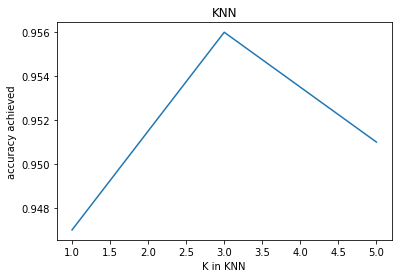

In [39]:
# import matplotlib.pyplot as plt 
# def split_acc_graph_knn():

  
#     #x axis values 
#      #x=acc_list
#     # corresponding y axis values 
#     y = [0.947,0.956,0.951] #acc-list
#      #y=[0.981,,0.9696]

#     # plotting the points  
#     plt.plot(x, y) 

#     # naming the x axis 
#     plt.xlabel('K in KNN') 
#     # naming the y axis 
#     plt.ylabel('accuracy achieved') 

#     # giving a title to my graph 
#     plt.title('KNN') 

#     # function to show the plot 
#     plt.show() 
# split_acc_graph_knn()

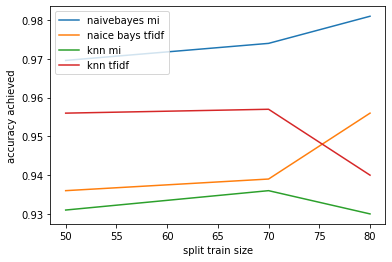

In [40]:
import matplotlib.pyplot as plt 
  
nb_mi= [0.981,0.974,0.9696] 
x_split=[80,70,50] 
nb_tfidf= [0.956,0.939,0.936] 
knn_mi=[0.93,0.936,0.931]                   #knn at k=3
knn_tfidf=[0.94,0.957,0.956]
# plotting the points  
plt.plot(x_split, nb_mi,label="naivebayes mi") 
plt.plot(x_split, nb_tfidf,label="naice bays tfidf")
plt.plot(x_split, knn_mi,label="knn mi")
plt.plot(x_split, knn_tfidf,label="knn tfidf")

plt.xlabel('split train size') 
# naming the y axis 
plt.ylabel('accuracy achieved') 
  
# giving a Overall Comparison') 
plt.legend()
  
# function to show the plot 
plt.show() 